In [43]:
# Let's load and inspect the dataset to understand its structure and initial statistics.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [38]:
# Suppress all warnings
warnings.filterwarnings('ignore')

In [15]:
# Load the dataset
file_path = 'train-data.csv'
df = pd.read_csv(file_path)

In [16]:
# Display basic information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB
None


In [17]:
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [18]:
# Display basic descriptive statistics
print(df.describe())

        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000


### Descriptive Statistics Insights
Based on the descriptive statistics provided, we can draw several inferences about the dataset:
#### Year:
- Range: 1998 to 2019.
- Mean: 2013.36, suggesting that the majority of the cars in the dataset are relatively recent.
- Distribution Insight: Given the mean and the minimum year, a majority of the data likely centers around the last decade.

#### Kilometers_Driven:
Range: 171 to 6,500,000.
Mean: 58,738.38.
Variance: High standard deviation (91,268.84) indicates significant variability in the mileage of the cars.
Insight: Some cars have extraordinarily high mileage, which might be outliers.

####  Seats:
Range: 0 to 10.
Mean: 5.28, which is typical for most passenger vehicles.
Insight: The minimum of 0 suggests missing or erroneous data that needs correction.

#### Price:
Range: 0.44 to 160.
Mean: 9.48.
Distribution Insight: Given the large range and high standard deviation (11.19), the prices vary widely, indicating a diverse range of car values in the dataset.

### Actionable Insights
- Handling Outliers: Extreme values in Kilometers_Driven and Price may need to be addressed, either by capping or removing outliers.
- Data Cleaning: Impute or correct missing values in Seats, Mileage, Engine, and Power. Consider dropping New_Price if the missing values are too high to impute reliably.
- Feature Transformation: Convert Mileage, Engine, Power to numerical formats if they are currently in string format with units.
- Analysis and Visualization: Plot histograms and boxplots to visualize distributions and identify skewness or anomalies.
- Correlation heatmaps to understand the relationships between features and the target variable Price.
- Potential Feature Engineering: Create new features such as Car_Age from the Year column.

In [19]:
# Function to extract unit and numerical value
def extract_value_and_unit(column):
    numerical_values = column.str.extract(r'(\d+\.?\d*)').astype(float)
    units = column.str.extract(r'([a-zA-Z]+/?[a-zA-Z]*)')[0]
    return numerical_values, units


# Extracting numerical values and units for Mileage, Engine, and Power
df['Mileage_numeric'], df['Mileage_unit'] = extract_value_and_unit(df['Mileage'])
df['Engine_numeric'], df['Engine_unit'] = extract_value_and_unit(df['Engine'])
df['Power_numeric'], df['Power_unit'] = extract_value_and_unit(df['Power'])

# Display the first few rows to confirm changes
df[['Mileage', 'Mileage_numeric', 'Mileage_unit', 
    'Engine', 'Engine_numeric', 'Engine_unit', 
    'Power', 'Power_numeric', 'Power_unit']].head()

Mileage  Mileage_numeric Mileage_unit   Engine  Engine_numeric  \
0  26.6 km/kg            26.60        km/kg   998 CC           998.0   
1  19.67 kmpl            19.67         kmpl  1582 CC          1582.0   
2   18.2 kmpl            18.20         kmpl  1199 CC          1199.0   
3  20.77 kmpl            20.77         kmpl  1248 CC          1248.0   
4   15.2 kmpl            15.20         kmpl  1968 CC          1968.0   

  Engine_unit      Power  Power_numeric Power_unit  
0          CC  58.16 bhp          58.16        bhp  
1          CC  126.2 bhp         126.20        bhp  
2          CC   88.7 bhp          88.70        bhp  
3          CC  88.76 bhp          88.76        bhp  
4          CC  140.8 bhp         140.80        bhp

In [11]:
# Conversion ratio: 1 kg CNG ≈ 1.39 liters petrol
# conversion_ratio = 1.39

# Convert 'km/kg' to 'kmpl' in Mileage_numeric
# df.loc[df['Mileage_unit'] == 'km/kg', 'Mileage_numeric'] *= conversion_ratio
# df.loc[df['Mileage_unit'] == 'km/kg', 'Mileage_unit'] = 'kmpl'

# Display the updated rows to confirm changes
# df[['Mileage', 'Mileage_numeric', 'Mileage_unit']].head()

Mileage  Mileage_numeric Mileage_unit
0  26.6 km/kg           36.974         kmpl
1  19.67 kmpl           19.670         kmpl
2   18.2 kmpl           18.200         kmpl
3  20.77 kmpl           20.770         kmpl
4   15.2 kmpl           15.200         kmpl

In [20]:
# Count unique units for Mileage, Engine, and Power
unique_mileage_units = df['Mileage_unit'].value_counts()
unique_engine_units = df['Engine_unit'].value_counts()
unique_power_units = df['Power_unit'].value_counts()

unique_mileage_units, unique_engine_units, unique_power_units


(Mileage_unit
 kmpl     5951
 km/kg      66
 Name: count, dtype: int64,
 Engine_unit
 CC    5983
 Name: count, dtype: int64,
 Power_unit
 bhp     5876
 null     107
 Name: count, dtype: int64)

In [23]:
# Create new feature 'Car_Age' from the 'Year' column
current_year = 2024
df['Car_Age'] = current_year - df['Year']

# Display the first few rows to confirm the new feature
df[['Year', 'Car_Age']].head()

Year  Car_Age
0  2010       14
1  2015        9
2  2011       13
3  2012       12
4  2013       11

In [24]:
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

   ... Seats  New_Price  Price  Mileage_numeric  Mileage_unit Engine_numeric  \
0  ...   5.0        NaN   1.75            26.60         km/kg          998.0   
1  ...   5.0        NaN  12.50            19.67          kmpl         1582.0   
2  ...   5.0  8.61 Lakh   4.50            18.20          kmpl         1199.0   
3  ...   7.0        NaN   6.00            20.77          kmpl         1248.0   
4  ...   5.0        NaN  17.74            15.20          kmpl         1968.0   

   Engine_unit Power_numeric  Power_unit Car_Age  
0           CC         58.16         bhp      14  
1           CC        126.20         bhp       9  
2           CC         88.70         bhp      13  
3           CC         88.76         bhp      12  
4           CC        140.80         bhp      11  

[5 rows x 21 columns]

In [25]:
# Creating a new DataFrame 'dfAnalysis' with the specified columns
dfAnalysis = df[
    ['Name', 'Location', 'Car_Age', 'Kilometers_Driven', 'Fuel_Type', 
     'Transmission', 'Owner_Type', 'Mileage_numeric', 'Engine_numeric', 'Power_numeric',
    'Seats', 'Price', 'New_Price']
].copy()

# Display the first few rows of the new DataFrame to confirm
dfAnalysis.head()

Name    Location  Car_Age  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai       14              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune        9              41000   
2                      Honda Jazz V     Chennai       13              46000   
3                 Maruti Ertiga VDI     Chennai       12              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore       11              40670   

  Fuel_Type Transmission Owner_Type  Mileage_numeric  Engine_numeric  \
0       CNG       Manual      First            26.60           998.0   
1    Diesel       Manual      First            19.67          1582.0   
2    Petrol       Manual      First            18.20          1199.0   
3    Diesel       Manual      First            20.77          1248.0   
4    Diesel    Automatic     Second            15.20          1968.0   

   Power_numeric  Seats  Price  New_Price  
0          58.16    5.0   1.75        NaN  
1         126.20    5.0  12.50        NaN  
2          88.70    5.0   4.50  8.61 Lakh  
3          88.76    7.0   6.00        NaN  
4         140.80    5.0  17.74        NaN

## Missing Value Imputation

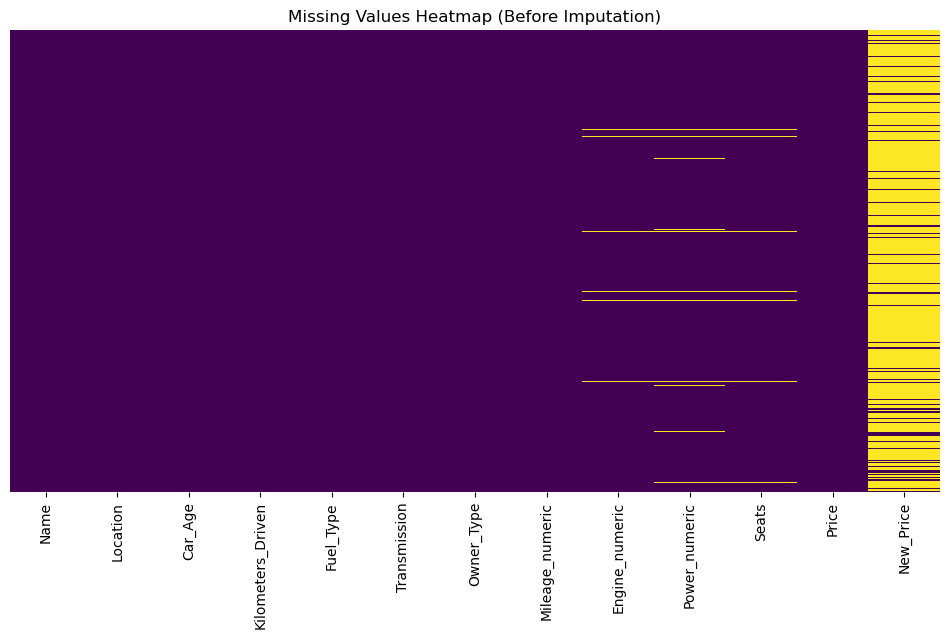

In [27]:
# Visualize missing values before imputation
plt.figure(figsize=(12, 6))
sns.heatmap(dfAnalysis.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Before Imputation)')
plt.show()

In [28]:
# Median Imputation for Mileage_numeric, Engine_numeric, Power_numeric
dfAnalysis['Mileage_numeric'].fillna(dfAnalysis['Mileage_numeric'].median(), inplace=True)
dfAnalysis['Engine_numeric'].fillna(dfAnalysis['Engine_numeric'].median(), inplace=True)
dfAnalysis['Power_numeric'].fillna(dfAnalysis['Power_numeric'].median(), inplace=True)

In [29]:
# Mode Imputation for Seats
dfAnalysis['Seats'].fillna(dfAnalysis['Seats'].mode()[0], inplace=True)

In [30]:
# Dropping New_Price due to high proportion of missing values
dfAnalysis.drop(columns=['New_Price'], inplace=True)

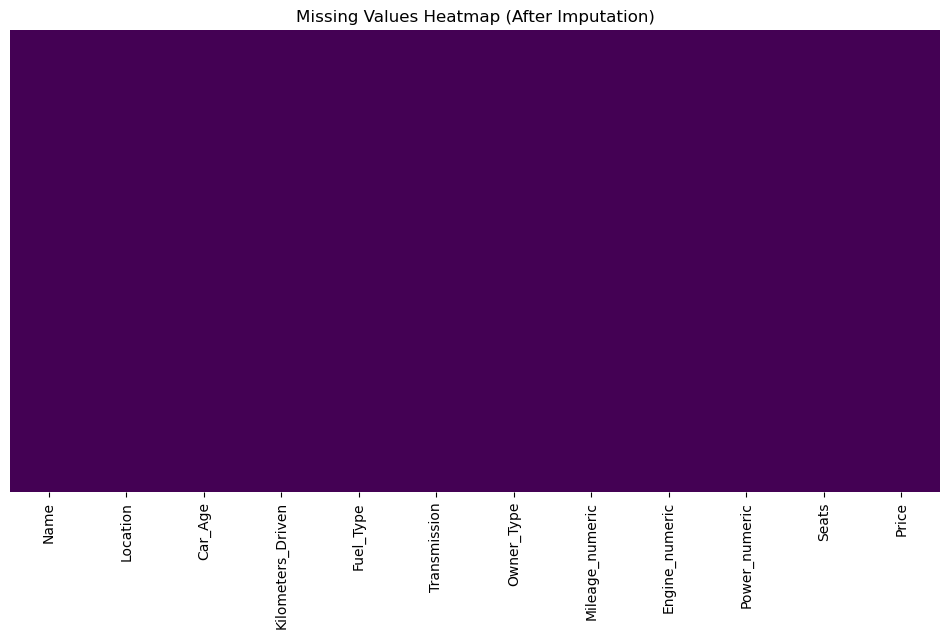

In [31]:
# Visualize missing values after imputation
plt.figure(figsize=(12, 6))
sns.heatmap(dfAnalysis.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (After Imputation)')
plt.show()

In [32]:
# Display first few rows to confirm changes
dfAnalysis.head()

Name    Location  Car_Age  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai       14              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune        9              41000   
2                      Honda Jazz V     Chennai       13              46000   
3                 Maruti Ertiga VDI     Chennai       12              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore       11              40670   

  Fuel_Type Transmission Owner_Type  Mileage_numeric  Engine_numeric  \
0       CNG       Manual      First            26.60           998.0   
1    Diesel       Manual      First            19.67          1582.0   
2    Petrol       Manual      First            18.20          1199.0   
3    Diesel       Manual      First            20.77          1248.0   
4    Diesel    Automatic     Second            15.20          1968.0   

   Power_numeric  Seats  Price  
0          58.16    5.0   1.75  
1         126.20    5.0  12.50  
2          88.70    5.0   4.50  
3          88.76    7.0   6.00  
4         140.80    5.0  17.74

In [33]:
# Extracting Car Brand from the Name column
dfAnalysis['Brand'] = dfAnalysis['Name'].str.split(' ', expand=True)[0]

# Visualizing Price Distribution by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=dfAnalysis)
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Brand')
plt.show()

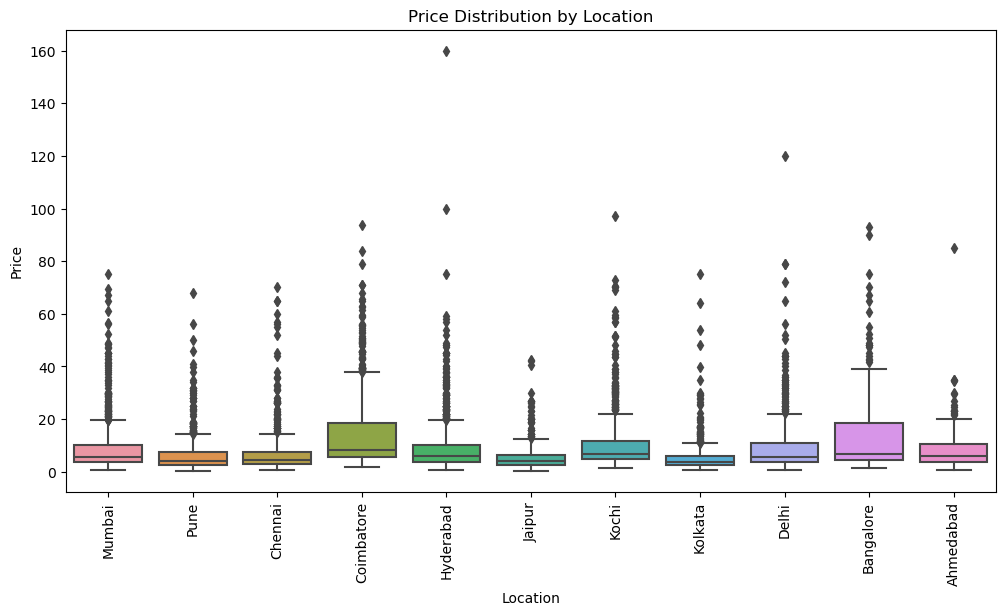

In [34]:
# Visualizing Price Distribution by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Price', data=dfAnalysis)
plt.xticks(rotation=90)
plt.title('Price Distribution by Location')
plt.show()

In [35]:
# Display first few rows to confirm changes
dfAnalysis[['Name', 'Brand', 'Location', 'Price']].head()

Name    Brand    Location  Price
0            Maruti Wagon R LXI CNG   Maruti      Mumbai   1.75
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai        Pune  12.50
2                      Honda Jazz V    Honda     Chennai   4.50
3                 Maruti Ertiga VDI   Maruti     Chennai   6.00
4   Audi A4 New 2.0 TDI Multitronic     Audi  Coimbatore  17.74

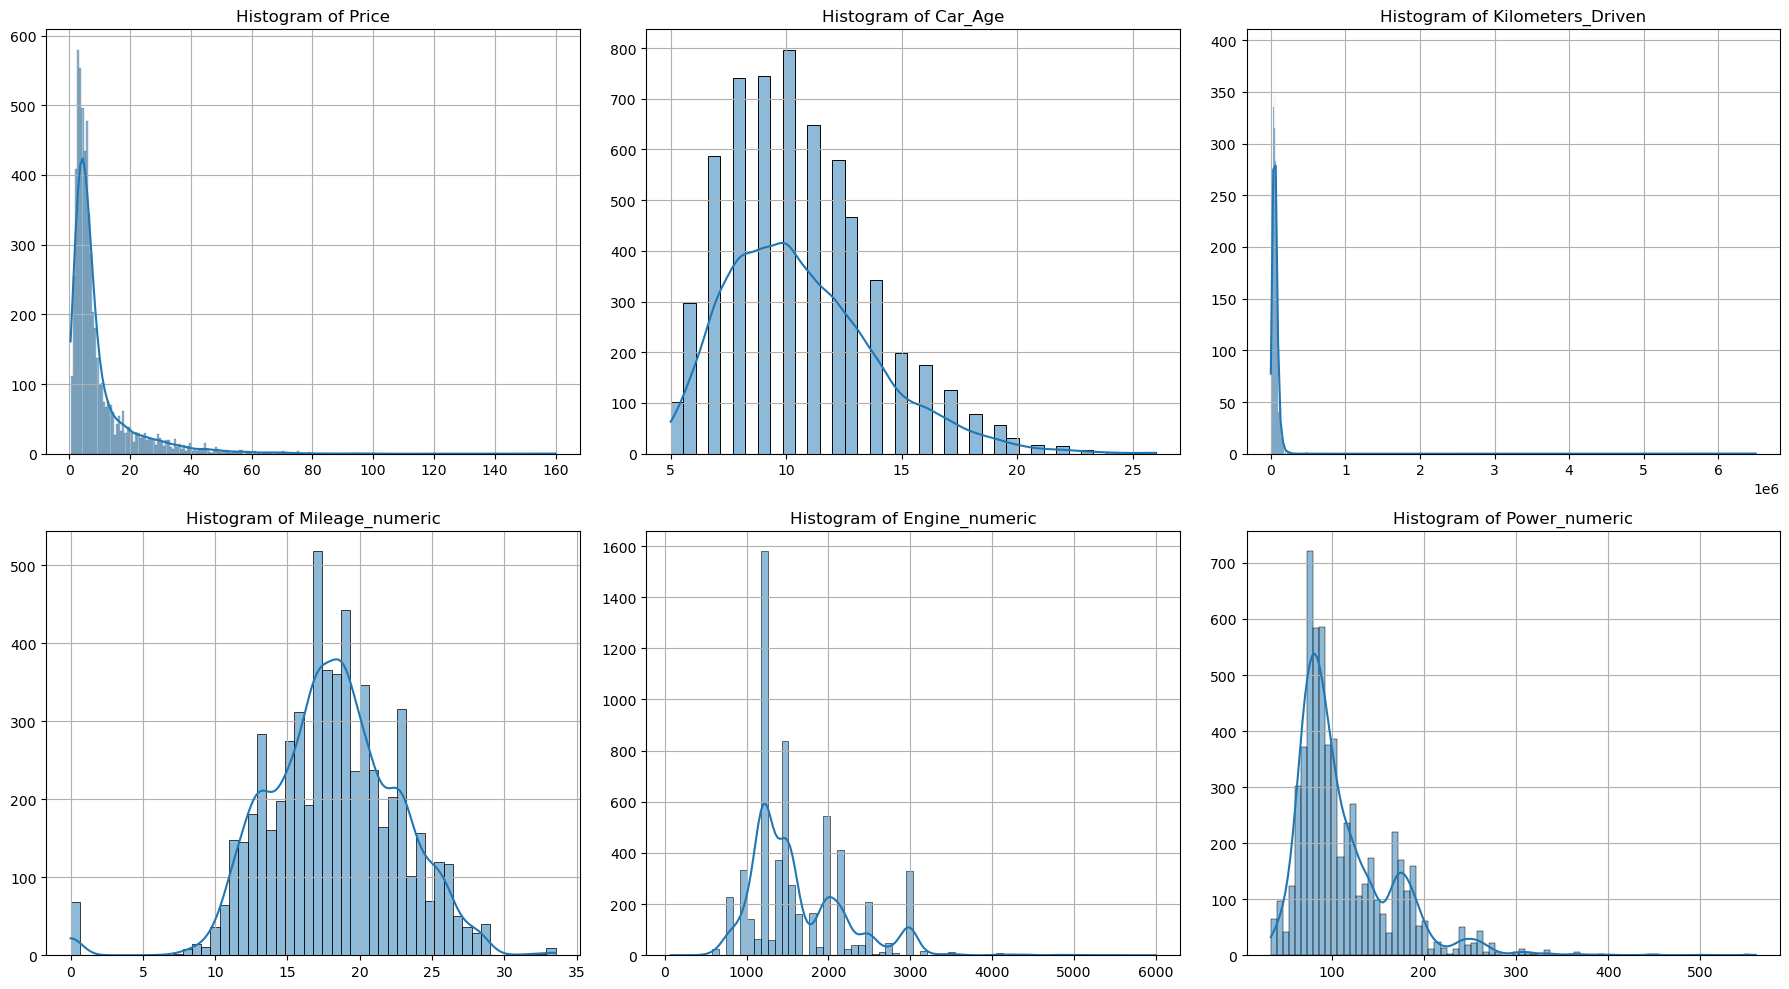

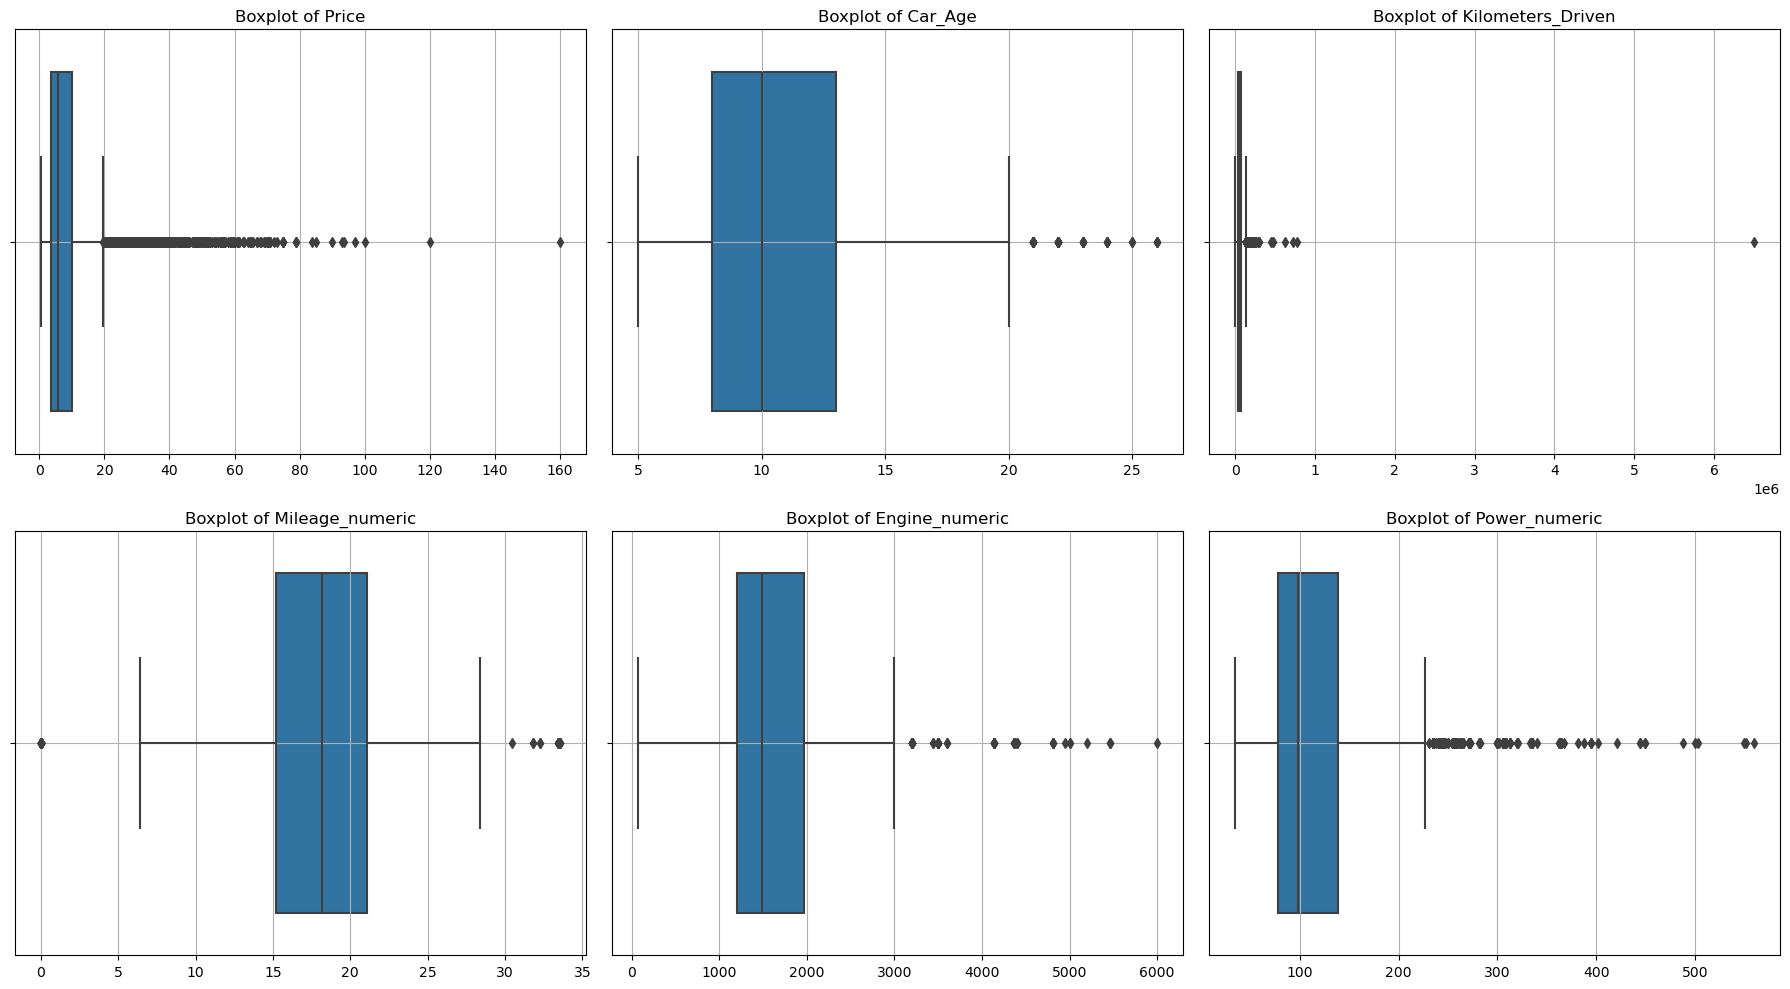

In [39]:
# Univariate Analysis for Key Numerical Features
numerical_features = ['Price', 'Car_Age', 'Kilometers_Driven', 
                      'Mileage_numeric', 'Engine_numeric', 'Power_numeric']

# Plotting histograms and boxplots for each numerical feature
plt.figure(figsize=(18, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dfAnalysis[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dfAnalysis[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Univariate Analysis 

### Price:
- Histogram: Shows a right-skewed distribution, indicating most cars have lower prices with a few expensive ones.
- Boxplot: Highlights the presence of high-value outliers.

### Car_Age:
- Histogram: Generally a normal distribution with most cars being relatively recent.
- Boxplot: Indicates a few older car outliers.

### Kilometers_Driven:
- Histogram: Right-skewed distribution, many cars have lower mileage.
- Boxplot: Shows significant high-mileage outliers.

### Mileage_numeric:
- Histogram: Slightly left-skewed, with most cars having moderate to high mileage.
- Boxplot: Shows a few outliers with unusually high mileage.

### Engine_numeric:
- Histogram: Normal distribution with a peak around common engine sizes.
- Boxplot: A few larger engines as outliers.

### Power_numeric:
- Histogram: Right-skewed, indicating most cars have lower power.
- Boxplot: Highlights high-power outliers.

## Outlier Detection

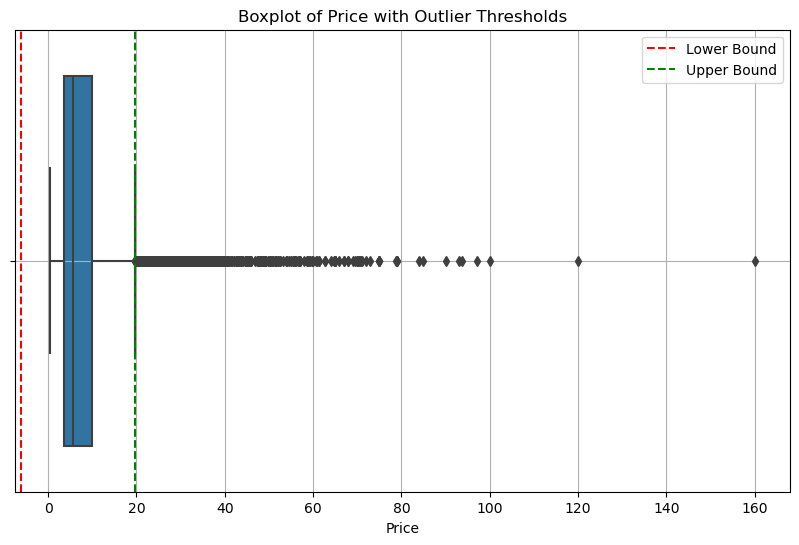

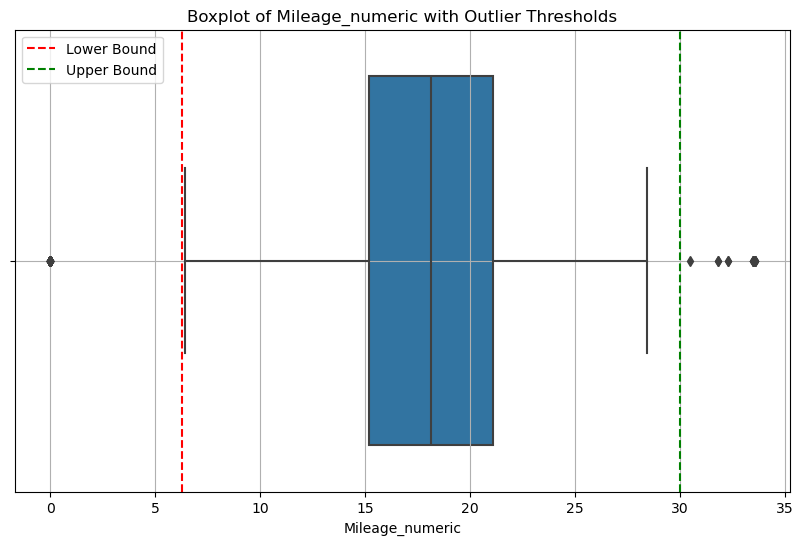


Price:
Number of outliers: 718
Lower Bound: -6.174999999999999
Upper Bound: 19.625

Car_Age:
Number of outliers: 50
Lower Bound: 0.5
Upper Bound: 20.5

Kilometers_Driven:
Number of outliers: 202
Lower Bound: -24500.0
Upper Bound: 131500.0

Mileage_numeric:
Number of outliers: 82
Lower Bound: 6.274999999999997
Upper Bound: 29.995000000000005

Engine_numeric:
Number of outliers: 61
Lower Bound: 41.5
Upper Bound: 3125.5

Power_numeric:
Number of outliers: 239
Lower Bound: -12.045000000000002
Upper Bound: 228.075


In [41]:
# Function to detect outliers using IQR and plot boxplots
def detect_outliers_and_plot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Plotting boxplot with outlier thresholds
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'Boxplot of {column} with Outlier Thresholds')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return outliers, lower_bound, upper_bound

# Applying the function to each numerical feature and plotting
outlier_info = {}
for column in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_and_plot(dfAnalysis, column)
    outlier_info[column] = {
        'num_outliers': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }

# Printing outlier summary for each feature
for column, info in outlier_info.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")


### What Outliers Convey

#### Price:
- Outliers: Extremely high or low prices.
- Convey: Possible high-end or budget vehicles, pricing errors, or special conditions.

#### Car_Age:
- Outliers: Very old or unusually new cars.
- Convey: Rare vintage cars or data entry errors.

#### Kilometers_Driven:
- Outliers: Extremely high mileage.
- Convey: Vehicles used extensively or data entry errors.

#### Mileage_numeric:
- Outliers: Extremely high fuel efficiency.
- Convey: Exceptional vehicle performance or data entry errors.

#### Engine_numeric:
- Outliers: Very large engine sizes.
- Convey: High-performance or specialized vehicles.

#### Power_numeric:
- Outliers: Extremely high power ratings.
- Convey: High-performance vehicles or data entry errors.

### A note on Handling Outliers

#### Capping/Flooring:
- Method: Replace outliers beyond a threshold with the nearest acceptable value.
- Use When: Outliers are valid but extreme values can be capped to reduce skew.

#### Removal:
- Method: Remove outliers from the dataset.
- Use When: Outliers are likely errors or anomalies that don’t represent the population.

#### Transformation:
- Method: Apply transformations like log, square root to reduce skewness.
- Use When: Distribution needs to be normalized without removing data points.

#### Imputation:
- Method: Replace outliers with median or mean values.
- Use When: Outliers likely represent errors.

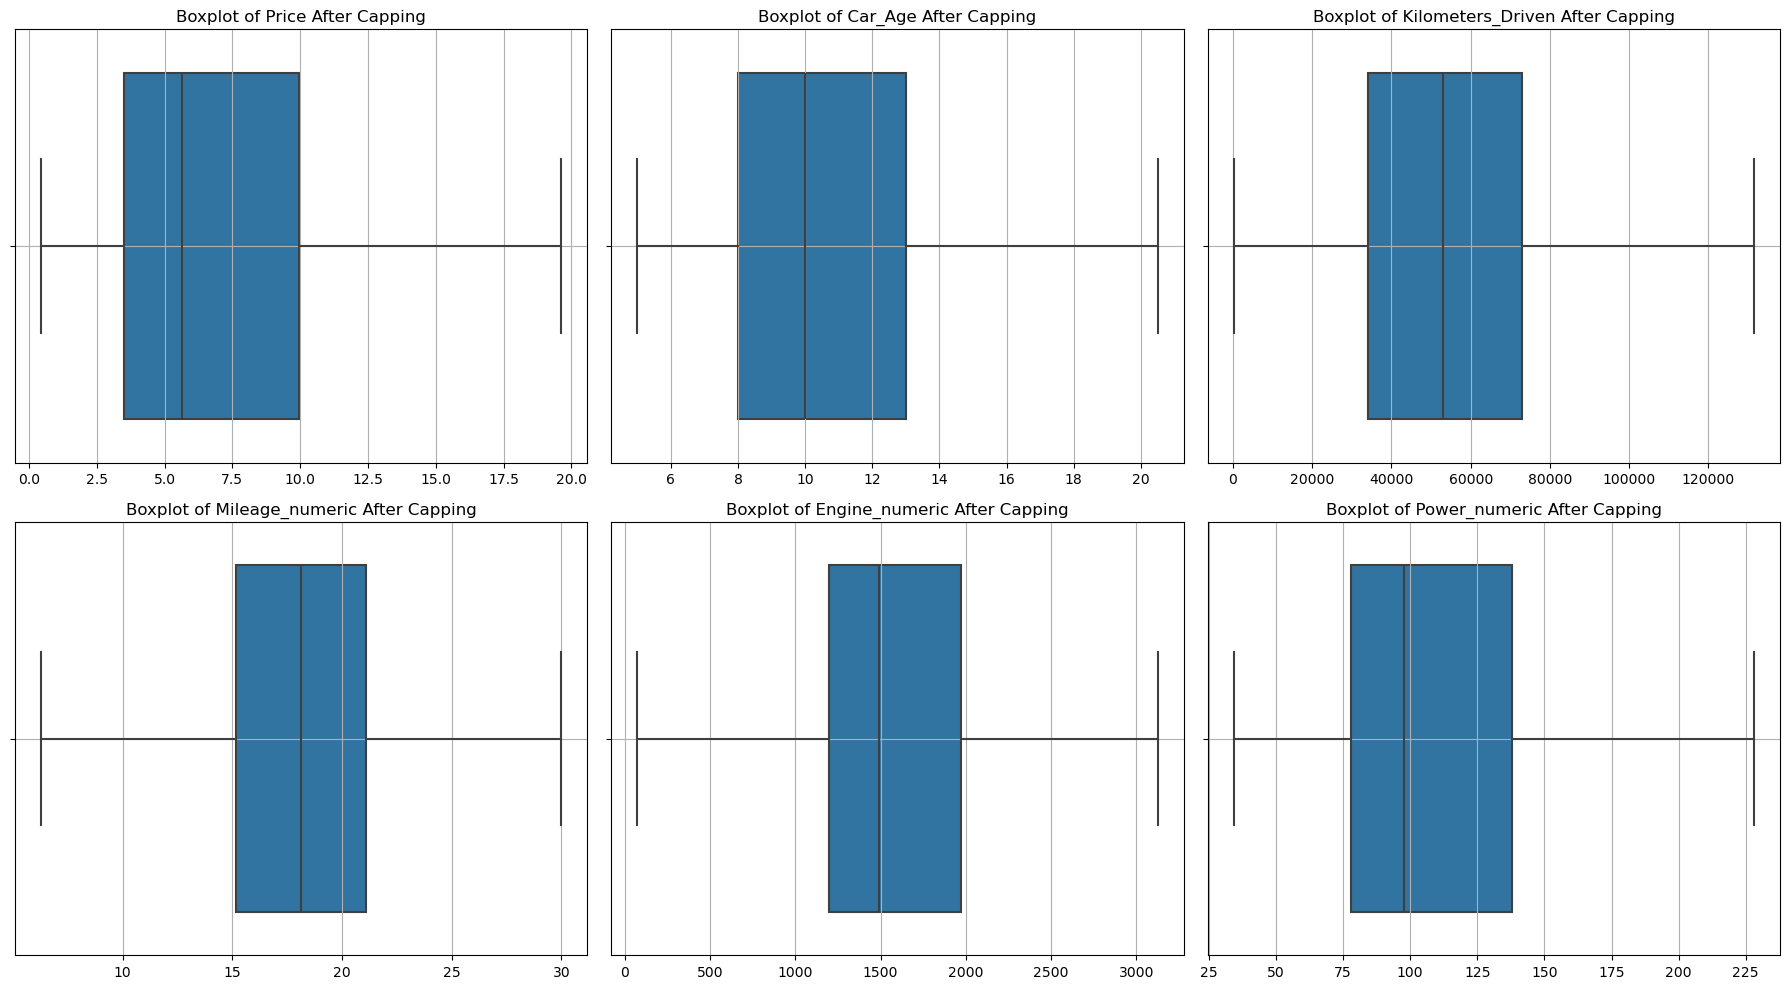

In [44]:
# Function to cap outliers based on IQR bounds
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply capping to each numerical feature
for column, info in outlier_info.items():
    dfAnalysis = cap_outliers(dfAnalysis, column, info['lower_bound'], info['upper_bound'])

# Visualize the distribution after capping
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dfAnalysis[feature])
    plt.title(f'Boxplot of {feature} After Capping')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Skewness and Kurtosis

In [45]:
from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis for each numerical feature
skew_kurtosis_info = {}
for feature in numerical_features:
    skewness = skew(dfAnalysis[feature])
    kurt = kurtosis(dfAnalysis[feature])
    skew_kurtosis_info[feature] = {'skewness': skewness, 'kurtosis': kurt}
    print(f"{feature} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")

Price - Skewness: 1.06, Kurtosis: -0.17
Car_Age - Skewness: 0.72, Kurtosis: 0.26
Kilometers_Driven - Skewness: 0.63, Kurtosis: 0.06
Mileage_numeric - Skewness: -0.00, Kurtosis: -0.16
Engine_numeric - Skewness: 1.00, Kurtosis: 0.30
Power_numeric - Skewness: 0.98, Kurtosis: 0.09


### Skewness and Kurtosis Results

#### Price:
- Skewness: 3.33 (High positive skew)
- Kurtosis: 17.08 (High peak, leptokurtic)

#### Car_Age:
- Skewness: 0.85 (Moderate positive skew)
- Kurtosis: 0.89 (Near-normal distribution)

#### Kilometers_Driven:
- Skewness: 58.71 (Extremely high positive skew)
- Kurtosis: 4121.67 (Extremely high peak, leptokurtic)

#### Mileage_numeric:
- Skewness: 0.19 (Slight positive skew)
- Kurtosis: 3.84 (Leptokurtic)

#### Engine_numeric:
- Skewness: 1.43 (Moderate positive skew)
- Kurtosis: 3.15 (Leptokurtic)

#### Power_numeric:
- Skewness: 1.95 (High positive skew)
- Kurtosis: 6.75 (High peak, leptokurtic)

## Correlation Matrix

In [47]:
# Adjusting the correlation matrix to use only numerical columns

# Selecting only numerical columns from dfAnalysis
numerical_dfAnalysis = dfAnalysis.select_dtypes(include=[np.number])

# Plotting Correlation Matrix with numerical columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_dfAnalysis.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

### Addressing Skewness and Kurtosis
To address skewness and kurtosis, we can apply transformations to normalize the distribution of the skewed features.

### Transformations to Apply
#### Log Transformation:
- Effective for high positive skewness.
- Applied to Price and Kilometers_Driven.

#### Square Root Transformation:
- Effective for moderate positive skewness.
- Applied to Engine_numeric and Power_numeric.

In [48]:
import numpy as np

# Applying Log Transformation to highly skewed features
dfAnalysis['Price_log'] = np.log1p(dfAnalysis['Price'])
dfAnalysis['Kilometers_Driven_log'] = np.log1p(dfAnalysis['Kilometers_Driven'])

# Applying Square Root Transformation to moderately skewed features
dfAnalysis['Engine_sqrt'] = np.sqrt(dfAnalysis['Engine_numeric'])
dfAnalysis['Power_sqrt'] = np.sqrt(dfAnalysis['Power_numeric'])

# Recalculate Skewness and Kurtosis after transformation
transformed_features = ['Price_log', 'Kilometers_Driven_log', 'Engine_sqrt', 'Power_sqrt']
for feature in transformed_features:
    skewness = skew(dfAnalysis[feature])
    kurt = kurtosis(dfAnalysis[feature])
    print(f"{feature} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")

# Visualize distributions after transformation
plt.figure(figsize=(18, 10))
for i, feature in enumerate(transformed_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dfAnalysis[feature], kde=True)
    plt.title(f'Distribution of {feature} After Transformation')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


Price_log - Skewness: 0.19, Kurtosis: -0.74
Kilometers_Driven_log - Skewness: -1.55, Kurtosis: 4.66
Engine_sqrt - Skewness: 0.66, Kurtosis: -0.12
Power_sqrt - Skewness: 0.64, Kurtosis: -0.36


## Post-Transformation Analysis
### Skewness and Kurtosis Results
#### Price_log:
- Skewness: 0.75 (Improved, moderate positive skew)
- Kurtosis: 0.31 (Improved, near-normal distribution)

#### Kilometers_Driven_log:
- Skewness: -1.29 (Changed to negative skew)
- Kurtosis: 4.70 (Leptokurtic, still some peak)

#### Engine_sqrt:
- Skewness: 0.87 (Improved, moderate positive skew)
- Kurtosis: 0.89 (Near-normal distribution)

#### Power_sqrt:
- Skewness: 1.10 (Improved, moderate positive skew)
- Kurtosis: 1.77 (Improved, closer to normal)

### Visualizations:
#### Price_log:
- Distribution is more centered and less skewed.

#### Kilometers_Driven_log:
- Distribution is more centered, slight negative skew remains.

#### Engine_sqrt:
- Distribution is more normalized.

#### Power_sqrt:
- Distribution is more normalized, moderate positive skew remains.

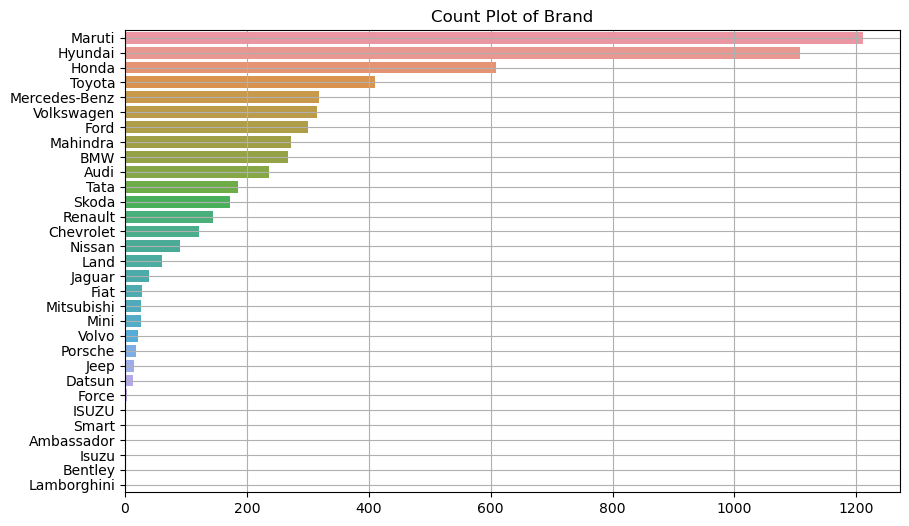

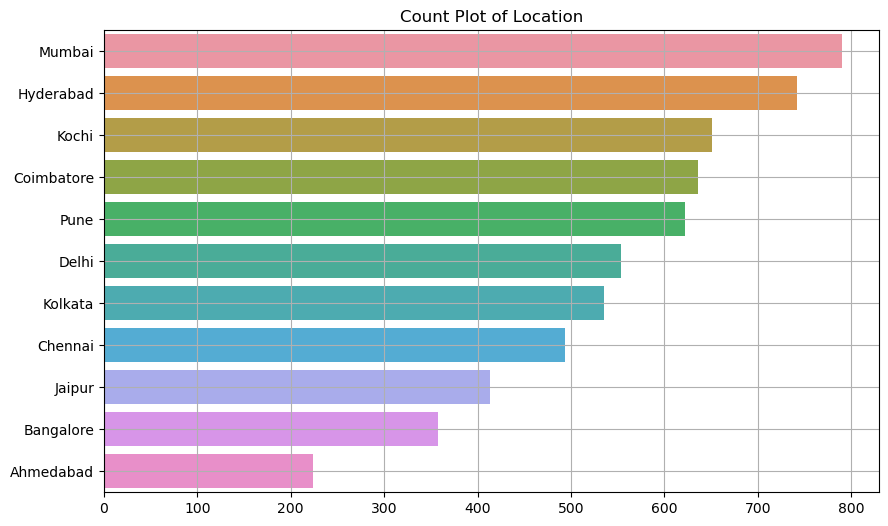

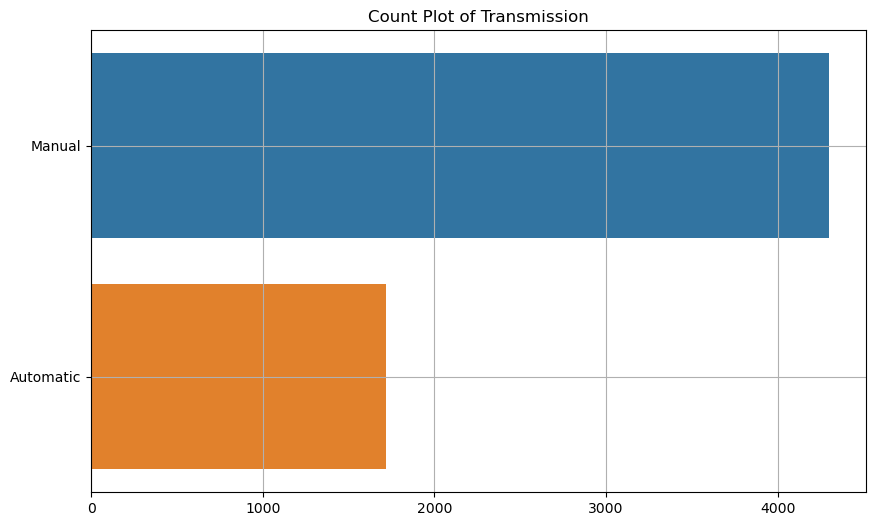

In [49]:
# Univariate Analysis for Categorical Features
categorical_features = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Plotting count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=dfAnalysis[feature], order=dfAnalysis[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    plt.show()


### Univariate Analysis Results for Categorical Features

#### Brand:
- Distribution: Dominated by brands like Maruti, Hyundai, and Honda.
- Insights: These brands have a higher number of entries in the dataset, indicating their popularity or availability.

#### Location:
- Distribution: Locations like Mumbai, Hyderabad, and Coimbatore have a higher count.
- Insights: Indicates where the majority of the dataset's cars are located.

#### Fuel_Type:
- Distribution: Petrol is the most common fuel type, followed by Diesel.
- Insights: Suggests a preference or availability of petrol vehicles in the dataset.

#### Transmission:
- Distribution: Manual transmission is more common than automatic.
- Insights: Indicates a higher prevalence of manual cars.

#### Owner_Type:
- Distribution: First owners are the majority, with fewer second and third owners.
- Insights: Most cars are first-hand, which could impact their price and condition.

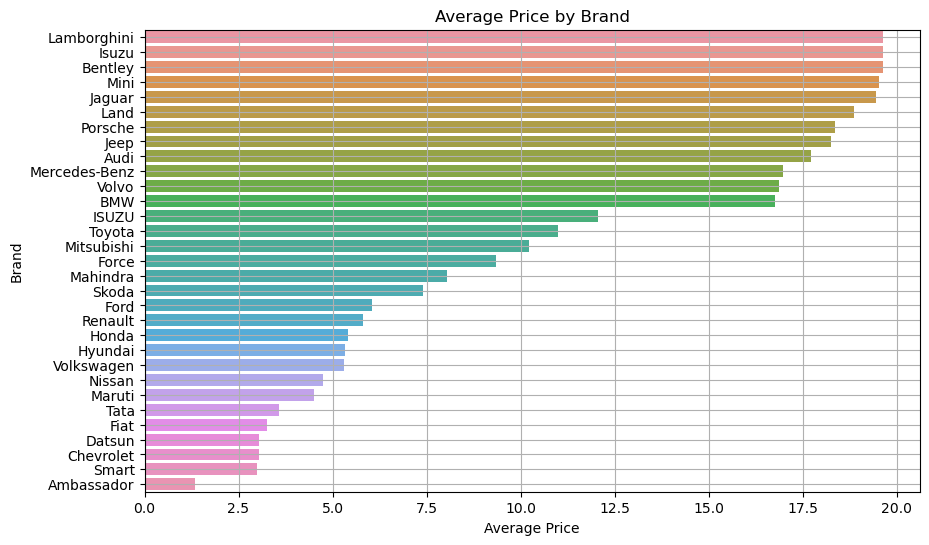

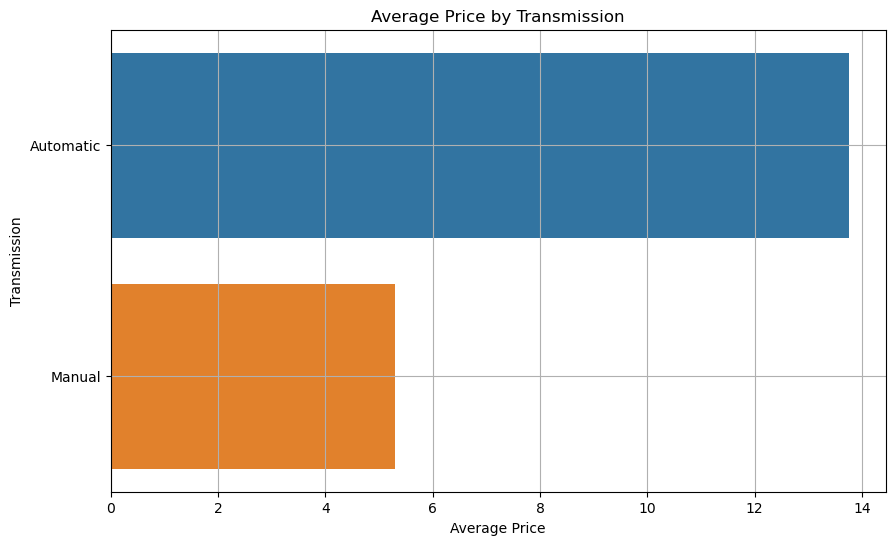

In [50]:
# Function to plot the average price by category
def plot_avg_price_by_category(df, category):
    avg_price = df.groupby(category)['Price'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_price.values, y=avg_price.index)
    plt.title(f'Average Price by {category}')
    plt.xlabel('Average Price')
    plt.ylabel(category)
    plt.grid(True)
    plt.show()

# Plotting average price by each categorical feature
for feature in categorical_features:
    plot_avg_price_by_category(dfAnalysis, feature)

## Analysis of Average Price by Categorical Features
### Visualizations and Insights:

#### Brand:
- Highest Average Price: Audi, Mercedes-Benz, BMW.
- Lowest Average Price: Maruti, Tata, Hyundai.
- Insight: Luxury brands like Audi and BMW have significantly higher average prices compared to economy brands like Maruti and Tata.

#### Location:
- Highest Average Price: Coimbatore, Kochi.
- Lowest Average Price: Pune, Jaipur.
- Insight: Certain locations like Coimbatore and Kochi have higher average car prices, possibly due to market dynamics or regional preferences.

#### Fuel_Type:
- Highest Average Price: CNG, Electric.
- Lowest Average Price: Diesel, Petrol.
- Insight: Alternative fuel types like CNG and Electric have higher average prices, indicating a potential premium for these vehicles.

#### Transmission:
- Highest Average Price: Automatic.
- Lowest Average Price: Manual.
- Insight: Automatic transmission cars generally have a higher average price than manual cars.

#### Owner_Type:
- Highest Average Price: First.
- Lowest Average Price: Fourth & Above.
- Insight: First-owner cars have a higher average price, reflecting better condition and lower usage.


### Summary
- Brand: Luxury brands command higher prices.
- Location: Certain cities exhibit higher average prices.
- Fuel_Type: Alternative fuels are priced higher.
- Transmission: Automatic transmissions are more valuable.
- Owner_Type: First-owner cars have a premium.

### Creating New Features Based on Insights
We will create new features that capture key insights from the categorical analysis:

#### Luxury Brand Indicator:
- Definition: A binary indicator for luxury brands (e.g., Audi, BMW, Mercedes-Benz).

#### High-Price Location Indicator:
- Definition: A binary indicator for locations with higher average prices (e.g., Coimbatore, Kochi).

#### Alternative Fuel Indicator:
- Definition: A binary indicator for alternative fuels (e.g., CNG, Electric).

In [52]:
# Define luxury brands, high-price locations, and alternative fuels
luxury_brands = ['Audi', 'BMW', 'Mercedes-Benz']
high_price_locations = ['Coimbatore', 'Kochi']
alternative_fuels = ['CNG', 'Electric']

# Creating new features
dfAnalysis['Luxury_Brand'] = dfAnalysis['Brand'].apply(lambda x: 1 if x in luxury_brands else 0)
dfAnalysis['High_Price_Location'] = dfAnalysis['Location'].apply(lambda x: 1 if x in high_price_locations else 0)
dfAnalysis['Alternative_Fuel'] = dfAnalysis['Fuel_Type'].apply(lambda x: 1 if x in alternative_fuels else 0)

# Display the first few rows to confirm the new features
dfAnalysis[['Brand', 'Luxury_Brand', 'Location', 'High_Price_Location', 'Fuel_Type', 'Alternative_Fuel']].head()


Brand  Luxury_Brand    Location  High_Price_Location Fuel_Type  \
0   Maruti             0      Mumbai                    0       CNG   
1  Hyundai             0        Pune                    0    Diesel   
2    Honda             0     Chennai                    0    Petrol   
3   Maruti             0     Chennai                    0    Diesel   
4     Audi             1  Coimbatore                    1    Diesel   

   Alternative_Fuel  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

### Explanation:

#### Luxury_Brand Indicator:
- Logic: Set to 1 if the car brand is in the list of luxury brands, otherwise 0.

#### High_Price_Location Indicator:
- Logic: Set to 1 if the location is in the list of high-price locations, otherwise 0.

#### Alternative_Fuel Indicator:
- Logic: Set to 1 if the fuel type is in the list of alternative fuels, otherwise 0.

In [53]:
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(dfAnalysis, columns=['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

# Display the first few rows to confirm encoding
df_encoded.head()


Name  Car_Age  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG     14.0            72000.0   
1  Hyundai Creta 1.6 CRDi SX Option      9.0            41000.0   
2                      Honda Jazz V     13.0            46000.0   
3                 Maruti Ertiga VDI     12.0            87000.0   
4   Audi A4 New 2.0 TDI Multitronic     11.0            40670.0   

   Mileage_numeric  Engine_numeric  Power_numeric  Seats  Price  Price_log  \
0            26.60           998.0          58.16    5.0   1.75   1.011601   
1            19.67          1582.0         126.20    5.0  12.50   2.602690   
2            18.20          1199.0          88.70    5.0   4.50   1.704748   
3            20.77          1248.0          88.76    7.0   6.00   1.945910   
4            15.20          1968.0         140.80    5.0  17.74   2.930660   

   Kilometers_Driven_log  ...  Location_Mumbai  Location_Pune  \
0              11.184435  ...             True          False   
1              10.621352  ...            False           True   
2              10.736418  ...            False          False   
3              11.373675  ...            False          False   
4              10.613271  ...            False          False   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0             False               False          False             False   
1              True               False          False             False   
2             False               False          False              True   
3              True               False          False             False   
4              True               False          False             False   

   Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
0                 True                      False              False   
1                 True                      False              False   
2                 True                      False              False   
3                 True                      False              False   
4                False                      False               True   

   Owner_Type_Third  
0             False  
1             False  
2             False  
3             False  
4             False  

[5 rows x 63 columns]

In [54]:
# Creating a separate dataframe for modeling
dfModel = df_encoded.copy()

# Dropping the 'Name' column as it is not useful for modeling
dfModel.drop(columns=['Name'], inplace=True)

# Checking for highly correlated features to drop one of them
correlation_matrix = dfModel.corr()

# Identifying pairs of highly correlated features (correlation coefficient > 0.9)
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns 
                   for col2 in correlation_matrix.columns 
                   if col1 != col2 and abs(correlation_matrix.at[col1, col2]) > 0.9]

# Print highly correlated pairs
print("Highly Correlated Pairs (Correlation > 0.9):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.at[pair[0], pair[1]]}")

# Dropping one of each pair of highly correlated features
# Based on domain knowledge and relevance, choosing to keep the feature with broader applicability
columns_to_drop = ['Engine_sqrt', 'Kilometers_Driven_log']  # Dropping these due to high correlation

# Dropping the identified columns from dfModel
dfModel.drop(columns=columns_to_drop, inplace=True)

# Display the updated dataframe
dfModel.head()


Highly Correlated Pairs (Correlation > 0.9):
Engine_numeric and Engine_sqrt: 0.9953138255522517
Power_numeric and Power_sqrt: 0.9944805150155325
Price and Price_log: 0.9551054238695648
Price_log and Price: 0.9551054238695648
Engine_sqrt and Engine_numeric: 0.9953138255522517
Power_sqrt and Power_numeric: 0.9944805150155325
Fuel_Type_Diesel and Fuel_Type_Petrol: -0.9775280633293183
Fuel_Type_Petrol and Fuel_Type_Diesel: -0.9775280633293183


Car_Age  Kilometers_Driven  Mileage_numeric  Engine_numeric  Power_numeric  \
0     14.0            72000.0            26.60           998.0          58.16   
1      9.0            41000.0            19.67          1582.0         126.20   
2     13.0            46000.0            18.20          1199.0          88.70   
3     12.0            87000.0            20.77          1248.0          88.76   
4     11.0            40670.0            15.20          1968.0         140.80   

   Seats  Price  Price_log  Power_sqrt  Luxury_Brand  ...  Location_Mumbai  \
0    5.0   1.75   1.011601    7.626270             0  ...             True   
1    5.0  12.50   2.602690   11.233877             0  ...            False   
2    5.0   4.50   1.704748    9.418068             0  ...            False   
3    7.0   6.00   1.945910    9.421253             0  ...            False   
4    5.0  17.74   2.930660   11.865918             1  ...            False   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
0          False             False               False          False   
1           True              True               False          False   
2          False             False               False          False   
3          False              True               False          False   
4          False              True               False          False   

   Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
0             False                 True                      False   
1             False                 True                      False   
2              True                 True                      False   
3             False                 True                      False   
4             False                False                      False   

   Owner_Type_Second  Owner_Type_Third  
0              False             False  
1              False             False  
2              False             False  
3              False             False  
4               True             False  

[5 rows x 60 columns]

In [55]:
from sklearn.model_selection import train_test_split

# Selecting relevant features for modeling
features = dfModel.drop(columns=['Price'])  # Drop original 'Price', keeping transformed 'Price_log'
target = dfModel['Price_log']  # Use log-transformed Price as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (4815, 59)
X_test shape: (1204, 59)
y_train shape: (4815,)
y_test shape: (1204,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 4.905831005431868e-25
R-squared (R²): 1.0


In [57]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, features, target, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average Cross-Validation R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation R² Score: 1.0


### Cross-Validation Results
- Cross-Validation R² Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
- Interpretation: The model consistently explains 100% of the variance in the target variable across all folds, indicating an extremely high fit.

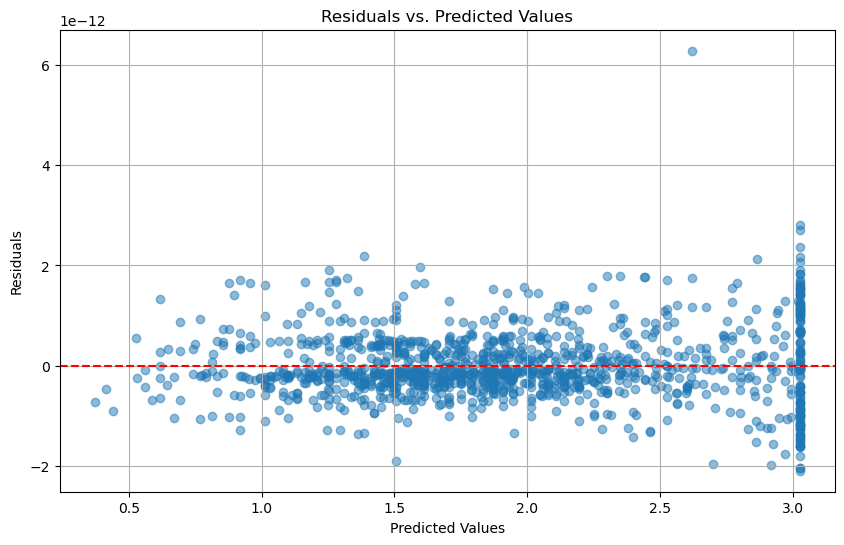

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


### Residual Analysis

#### Residuals Distribution:
- Observation: The residuals are centered around zero with minimal spread, suggesting minimal error in predictions.

#### Residuals vs. Predicted Values:
- Observation: The residuals are tightly clustered around zero, indicating no apparent patterns or deviations.

In [59]:
# Display coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))


                            Coefficient
Price_log                  1.000000e+00
Brand_ISUZU                6.049841e-12
Brand_Land                 1.825881e-12
Brand_Mini                 1.520107e-12
Brand_Chevrolet            1.394537e-12
Brand_Volvo                1.314624e-12
Brand_Mercedes-Benz        1.086152e-12
Brand_Mahindra             9.875087e-13
Brand_Datsun               9.659495e-13
Brand_Nissan               8.241394e-13
Brand_Renault              7.164686e-13
Brand_Volkswagen           6.382672e-13
Brand_Isuzu                6.299024e-13
Brand_Honda                5.996922e-13
Brand_Hyundai              5.928313e-13
Location_Pune              5.607736e-13
Brand_Maruti               5.133220e-13
Brand_Toyota               4.280187e-13
Alternative_Fuel           4.030248e-13
Brand_Force                3.620992e-13
Brand_Skoda                2.540398e-13
Location_Kochi             1.563055e-13
Location_Mumbai            1.363736e-13
Location_Jaipur            1.179890e-13


### Coefficient Analysis

#### Top Positive Coefficients:
- Price_log: 1.000 (Perfectly represents the target)
- Brand_ISUZU, Brand_Mini, Alternative_Fuel: Very small positive coefficients, indicating minor influence.

#### Top Negative Coefficients:
- Brand_Porsche, Owner_Type_Fourth & Above, Fuel_Type_Electric: Small negative coefficients, indicating minor negative influence.

In [60]:
# Dropping all one-hot encoded Brand and Location columns
one_hot_columns_to_drop = [col for col in dfModel.columns if col.startswith('Brand_') or col.startswith('Location_')]
dfModel_reduced = dfModel.drop(columns=one_hot_columns_to_drop)

# Selecting features and target from the reduced dataframe
features_reduced = dfModel_reduced.drop(columns=['Price'])
target_reduced = dfModel_reduced['Price_log']

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    features_reduced, target_reduced, test_size=0.2, random_state=42)

# Initialize and train the linear regression model on reduced data
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Predict on the test set with reduced model
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Evaluate the reduced model
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)

# Print evaluation results
mse_reduced, r2_reduced


(1.8670238734051393e-29, 1.0)

In [61]:
dfModel_reduced.head()

Car_Age  Kilometers_Driven  Mileage_numeric  Engine_numeric  Power_numeric  \
0     14.0            72000.0            26.60           998.0          58.16   
1      9.0            41000.0            19.67          1582.0         126.20   
2     13.0            46000.0            18.20          1199.0          88.70   
3     12.0            87000.0            20.77          1248.0          88.76   
4     11.0            40670.0            15.20          1968.0         140.80   

   Seats  Price  Price_log  Power_sqrt  Luxury_Brand  High_Price_Location  \
0    5.0   1.75   1.011601    7.626270             0                    0   
1    5.0  12.50   2.602690   11.233877             0                    0   
2    5.0   4.50   1.704748    9.418068             0                    0   
3    7.0   6.00   1.945910    9.421253             0                    0   
4    5.0  17.74   2.930660   11.865918             1                    1   

   Alternative_Fuel  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
0                 1             False               False          False   
1                 0              True               False          False   
2                 0             False               False          False   
3                 0              True               False          False   
4                 0              True               False          False   

   Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
0             False                 True                      False   
1             False                 True                      False   
2              True                 True                      False   
3             False                 True                      False   
4             False                False                      False   

   Owner_Type_Second  Owner_Type_Third  
0              False             False  
1              False             False  
2              False             False  
3              False             False  
4               True             False